## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

### import 需要的套件

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Wine資料集（分類）

In [16]:
# 讀取Wine資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

In [17]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9444444444444444


### 波士頓房價預測（迴歸）

In [40]:
# 讀取Boston資料集
boston = datasets.load_boston()
print(boston.data.shape)
boston.feature_names

(506, 13)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [67]:
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = boston.data[:, np.newaxis, 4]
print("Data shape: ", X.shape) # 可以看見有 506 筆資料與我們取出的其中一個 feature
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.3, random_state=4)

Data shape:  (506, 1)


In [68]:
# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [69]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-31.60176769]
Mean squared error: 86.89


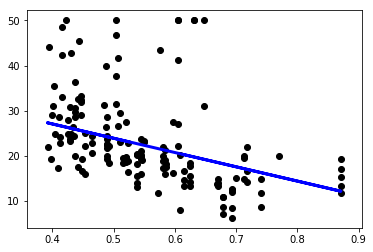

In [70]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()